資料來源: https://github.com/darrenjhsu/birdid
1.   共48,352 張圖片，橫跨 404 種北美常見的鳥種，以及一共 555 種型態
2.   MobileNetV2模型運算


In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from __future__ import absolute_import, division, print_function
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from keras.preprocessing import image
import tensorflow.keras as keras
keras = tf.keras
datapath = '/content/gdrive/My Drive/Bird_ID_project/nabirds'

Using TensorFlow backend.


In [3]:
train_frame = pd.read_csv(datapath+'/train.csv')
val_frame = pd.read_csv(datapath+'/val.csv')
test_frame = pd.read_csv(datapath+'/test.csv')
# train_frame
Bird_list=train_frame.class_name_sp.unique()
Bird_id=train_frame.class_id_sp.unique()
# print(Bird_list, Bird_id)
Birds = dict(zip(Bird_id, Bird_list))

In [ ]:
# cd "/content/gdrive/My Drive/Bird_ID_project/nabirds/"

In [ ]:
# DATADIR = "../nabirds/"
# IMAGEDIR = DATADIR + "images2/"

In [ ]:
#train_frame = pd.read_csv(datapath+'/train.csv')

In [ ]:
# create the list for bird classes
# idx2label = {}
# with open(DATADIR+"classes.txt") as f:
#     lines = f.readlines()
    
# for l in lines:
#     idx, name = l.split(' ', 1)
#     idx2label[int(idx)] = name.split('\n')[0]

In [ ]:
# dirlist = os.listdir(IMAGEDIR)

In [ ]:
# df = pd.DataFrame({'id':['1'], # ID
#                    'label': ['label'], # bird class
#                    'nimage' :[1], # number of images per bird category
#                    'path' : ['path'] # relative path to the directory
#                   })

# for i, d in enumerate(dirlist):
#     path = os.path.join(IMAGEDIR, d)
#     nimage = len(os.listdir(path))
#     df.loc[i] = [d, idx2label[int(d)], nimage, path]

In [ ]:
#df

In [ ]:
# import os, shutil
# from pathlib import Path

# def createDir(dirpath):
#     if os.path.isdir(dirpath):
#         print("# Directory exists: {}".format(dirpath))
#     else:
#         os.mkdir(dirpath)
#         print("# created {}".format(dirpath))

In [ ]:
# categories = ['{}'.format(i).zfill(4) for i in df['id']]      #['0753', '0772', '0852', '0822'...]
# dirtypes = ['train', 'validation', 'test']                    #['train', 'validation', 'test']

# base_dir = '/content/gdrive/My Drive/Bird_ID_project/nabirds/data/'
# createDir(base_dir)

# dirnames = {}
# for j, d in enumerate(dirtypes):
#     dirname = d
#     dirpath = os.path.join(base_dir, d)
#     dirnames[dirname] = dirpath               #test': '/content/gdrive/My Drive/Bird_ID_project/nabirds/data/test'
    
#     for c in categories:
#         dirname = d+"_"+c
#         subdirpath = os.path.join(dirpath, c)
#         dirnames[dirname] = subdirpath        #test_0753': '/content/gdrive/My Drive/Bird_ID_project/nabirds/data/test/0753

print("# Creating directories")               #產生目錄
# for k, v in dirnames.items():
#     print("{} : {}".format(k,v))
#     createDir(v)

# Creating directories


In [ ]:
#紀錄照片TVT的陣列
# def generateSplittedImageList(ID, ratios, showdir=True):
#     dirname = df['path'].loc[df['id']==ID].to_string().split(' ')[-1]
#     imagelist = os.listdir(dirname)
#     nimage = len(imagelist)
   
#     # generate a list of random integer for the image index
#     idx = np.arange(nimage)
#     np.random.shuffle(idx)
#     # create the stop-index for making the cut (length = len(ratios) + 1)
#     stop_idx = np.zeros((len(ratios)+1), dtype=int)
#     stop_idx[1:] = np.int32(np.array(ratios) * nimage)
#     stop_idx[-1] = nimage - stop_idx[:-1].sum() # fix the last number
#     for i in range(1, len(stop_idx)):
#         stop_idx[i] += stop_idx[i-1]
#     print(dirname, nimage, stop_idx)
    
#     idx_list = [idx[stop_idx[j]:stop_idx[j+1]] for j in range(len(ratios))  ]
    
#     if showdir:
#         return [[imagelist[i] for i in idx_list[j]] for j in range(len(ratios))], dirname
#     else:
#         return [[imagelist[i] for i in idx_list[j]] for j in range(len(ratios))]

In [ ]:
#移動照片到TVT
# dirtypes = ['train', 'validation', 'test']
# dirtypes_ratios = [0.8, 0.1, 0.1]

# for i in df['id']:
#     ID = '{}'.format(i).zfill(4)
#     imageList, imageDir = generateSplittedImageList(ID, dirtypes_ratios)
    
    
#     for j, dt in enumerate(dirtypes):
#         dirname = dt+"_"+ID
#         print(dirname, dirnames[dirname])
        
#         if os.path.isfile(dirnames[dirname]+"/COPYING_FINISHED"):
#             print("# Images already copied before. Not copying now...")
#         else:
#             for image in imageList[j]:
#                 src = os.path.join(imageDir, image)
#                 dst = os.path.join(dirnames[dirname], image)
#                 shutil.copyfile(src, dst)
#             Path(dirnames[dirname]+"/COPYING_FINISHED").touch()

In [4]:
train_datagen = image.ImageDataGenerator(              #張量格式
        rescale=1./255,           #重缩放因子
#         width_shift_range=0.1,     #寬平移
#         height_shift_range=0.1,    #高平移
#         zoom_range=0.1,      #随机缩放范围
        fill_mode='constant',    #周圍填充
        horizontal_flip=True,     #水平翻轉
        dtype=np.float32)

val_datagen = image.ImageDataGenerator(
        rescale=1./255, 
        dtype=np.float32)

test_datagen = image.ImageDataGenerator(
        rescale=1./255,
        dtype=np.float32)

train_generator = train_datagen.flow_from_directory(         
        directory=datapath + '/data/train/',
        #classes=list(Bird_list),
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')            #将是 one-hot 编码标签

validation_generator = val_datagen.flow_from_directory(
        directory=datapath + '/data/validation/',
        #classes=list(Bird_list),
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        directory=datapath + '/data/test/',
        shuffle=False,
        #classes=list(Bird_list),
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

Found 38655 images belonging to 555 classes.
Found 4626 images belonging to 555 classes.
Found 5281 images belonging to 555 classes.


In [ ]:
IMG_SHAPE = (224,224,3)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,           #是否在網絡頂部包括全連接層。
                                               weights='imagenet')          #載入預訓練 on ImageNet

base_model.trainable = False

global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = keras.layers.Dense(555,activation='softmax')
base_learning_rate = 0.0001
model = tf.keras.Sequential([
    base_model,
    global_average_layer,
    prediction_layer
])
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
model.summary()

9412608/9406464 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 555)               710955    
Total params: 2,968,939
Trainable params: 710,955
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
def fit_model(model, batch_size=32, epochs=1):    
    history = model.fit_generator(
        generator=train_generator,
        steps_per_epoch=(38655 // batch_size),
        epochs=epochs,
        validation_data=validation_generator,
        callbacks=None
        )
    score = model.evaluate_generator(train_generator, verbose=1)
    probs = model.predict_generator(test_generator, verbose=1)
    return model, score, probs, history

In [ ]:
fit_model, score, probs, history = fit_model(model, batch_size=32, epochs=1)

1207/1207 [==============================] - 10414s 9s/step - loss: 1.6632 - accuracy: 0.5939 - val_loss: 2.3251 - val_accuracy: 0.4572
Instructions for updating:
Please use Model.evaluate, which supports generators.
166/166 [==============================] - 174s 1s/step


In [ ]:
def top3(probs, GT):
    t3 = np.argsort(probs)[-3:]
    #print(t3)
    if GT in t3:
        return 1
    else:
        return 0
    
def top5(probs, GT):
    t5 = np.argsort(probs)[-5:]
    if GT in t5:
        return 1
    else:
        return 0
    
def top3_idx(probs):
    return np.flip(np.argsort(probs)[-3:],0), np.flip(probs[np.argsort(probs)[-3:]],0)
    #print(t3)

def top5_idx(probs):
    return np.flip(np.argsort(probs)[-5:])
    #print(t3)

In [ ]:
correct_prediction = 0
correct_top3 = 0
correct_top5 = 0
for ii in range(len(probs)):
    P_this = np.argmax(probs[ii])
    GT_this = test_generator.labels[ii]
    if P_this == GT_this:
        correct_prediction += 1
    correct_top3 += top3(probs[ii],GT_this)
    correct_top5 += top5(probs[ii],GT_this)
    #if ii < 10:
      #print("Prediction: {} ({})".format(P_this,Birds[int(list(test_generator.class_indices.keys())[list(test_generator.class_indices.values()).index(P_this)])]))
      #print("Actual: {} ({})".format(GT_this,Birds[int(list(test_generator.class_indices.keys())[list(test_generator.class_indices.values()).index(GT_this)])]))
      #print("Prediction: {} ".format(P_this))
      #print("Actual: {} ".format(GT_this))

print(correct_prediction, correct_prediction/len(probs))
print(correct_top3, correct_top3/len(probs))
print(correct_top5, correct_top5/len(probs))
print(len(probs))

NameError: ignored

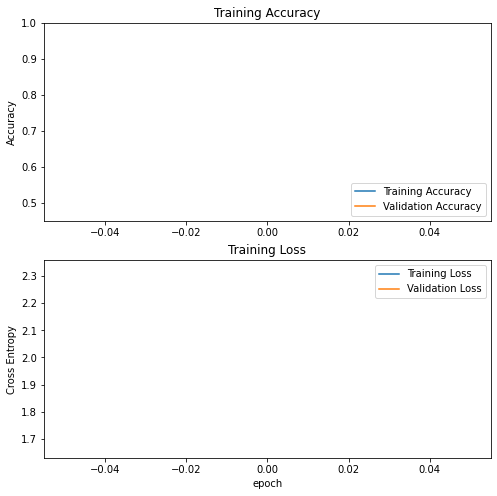

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
# plt.ylim([0,1.0])
plt.title('Training Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
#model.save(datapath + '/model3_30.h5')
#probs = model.predict_generator(test_generator, verbose=1)
#np.savetxt(datapath + '/probs30.txt', probs)

In [ ]:
# del model

In [5]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow import keras
model = keras.models.load_model(datapath + '/model3_10.h5')
#model = load_model()
#model.predict_generator(test_generator, verbose=1)

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 555)               710955    
Total params: 2,968,939
Trainable params: 710,955
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
# model.layers[0].layers[0].trainable

True

In [6]:
import tensorflow.keras as keras
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [11]:
for layer in model.layers[0].layers[:]:
    layer.trainable =  True

In [12]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(model.layers[0].layers))

# Fine tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in model.layers[0].layers[:fine_tune_at]:
    layer.trainable =  False

Number of layers in the base model:  155


In [13]:
for layer in model.layers[0].layers[:]:
    print(layer.trainable)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 555)               710955    
Total params: 2,968,939
Trainable params: 710,955
Non-trainable params: 2,257,984
_________________________________________________________________


In [14]:
base_learning_rate = 0.0001

In [15]:
model.compile(loss='categorical_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(lr=base_learning_rate/10),
              metrics=['accuracy'])

In [16]:
initial_epochs = 10
fine_tune_epochs = 7
total_epochs =  initial_epochs + fine_tune_epochs
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True,mode='max')
callbacks_list = [checkpoint]

def fit_model_FT(model, batch_size=32, epochs=10):    
    history = model.fit_generator(
        generator=train_generator,
        steps_per_epoch=(38655 // batch_size),
        epochs=total_epochs,
        initial_epoch=initial_epochs,
        validation_data=validation_generator,
        callbacks=callbacks_list
        )
    score = model.evaluate_generator(train_generator, verbose=1)
    probs = model.predict_generator(test_generator, verbose=1)
    return model, score, probs, history

In [ ]:
# initial_epochs = 10
# fine_tune_epochs = 10
# total_epochs =  initial_epochs + fine_tune_epochs

# def fit_model_FT(model, batch_size=32, epochs=10):    
#     history = model.fit_generator(
#         generator=train_generator,
#         steps_per_epoch=(38655 // batch_size),
#         epochs=total_epochs,
#         initial_epoch=initial_epochs,
#         validation_data=validation_generator,
#         callbacks= None
#         )
#     score = model.evaluate_generator(train_generator, verbose=1)
#     probs = model.predict_generator(test_generator, verbose=1)
#     return model, score, probs, history

In [ ]:
fit_model, score, probs, history = fit_model_FT(model, batch_size=32, epochs=10)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 11/17
1207/1207 [==============================] - ETA: 0s - loss: 2.1010 - accuracy: 0.5153 
Epoch 00011: val_accuracy improved from -inf to 0.48681, saving model to weights.best.hdf5
1207/1207 [==============================] - 24003s 20s/step - loss: 2.1010 - accuracy: 0.5153 - val_loss: 2.0996 - val_accuracy: 0.4868
Epoch 12/17
1207/1207 [==============================] - ETA: 0s - loss: 1.4817 - accuracy: 0.6253
Epoch 00012: val_accuracy improved from 0.48681 to 0.53869, saving model to weights.best.hdf5
1207/1207 [==============================] - 2563s 2s/step - loss: 1.4817 - accuracy: 0.6253 - val_loss: 1.8077 - val_accuracy: 0.5387
Epoch 13/17
1207/1207 [==============================] - ETA: 0s - loss: 1.2816 - accuracy: 0.6718
Epoch 00013: val_accuracy improved from 0.53869 to 0.56377, saving model to weights.best.hdf5
1207/1207 [==============================] - 2571s 2s/step - loss: 1.2816 -

In [ ]:
model.save(datapath + '/model3_20.h5')

In [ ]:
initial_epochs = 20
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs


def fit_model_FT2(model, batch_size=32, epochs=10):    
    history = model.fit_generator(
        generator=train_generator,
        steps_per_epoch=(38655 // batch_size),
        epochs=total_epochs,
        initial_epoch=initial_epochs,
        validation_data=validation_generator,
        callbacks=None
        )
    score = model.evaluate_generator(train_generator, verbose=1)
    probs = model.predict_generator(test_generator, verbose=1)
    return model, score, probs, history

In [ ]:
fit_model, score, probs, history = fit_model_FT2(model, batch_size=32, epochs=10)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 21/30
1207/1207 [==============================] - 10278s 9s/step - loss: 1.5785 - accuracy: 0.6132 - val_loss: 2.2974 - val_accuracy: 0.4665
Epoch 22/30
1207/1207 [==============================] - 1489s 1s/step - loss: 1.5715 - accuracy: 0.6157 - val_loss: 2.2972 - val_accuracy: 0.4654
Epoch 23/30
1207/1207 [==============================] - 1436s 1s/step - loss: 1.5628 - accuracy: 0.6171 - val_loss: 2.2962 - val_accuracy: 0.4665
Epoch 24/30
1207/1207 [==============================] - 1426s 1s/step - loss: 1.5605 - accuracy: 0.6175 - val_loss: 2.2947 - val_accuracy: 0.4663
Epoch 25/30
1207/1207 [==============================] - 1451s 1s/step - loss: 1.5583 - accuracy: 0.6183 - val_loss: 2.2933 - val_accuracy: 0.4678
Epoch 26/30
1207/1207 [==============================] - 1515s 1s/step - loss: 1.5542 - accuracy: 0.6197 - val_loss: 2.2933 - val_accuracy: 0.4667
Epoch 27/30
1207/1207 [==================

In [ ]:
correct_prediction = 0
correct_top3 = 0
correct_top5 = 0
for ii in range(len(probs)):
    P_this = np.argmax(probs[ii])
    GT_this = test_generator.labels[ii]
    if P_this == GT_this:
        correct_prediction += 1
    correct_top3 += top3(probs[ii],GT_this)
    correct_top5 += top5(probs[ii],GT_this)
   # if ii % 100 == 26:
#     if test_generator.labels[ii] == 10: # Gadwall
        #print("Prediction: {} ({})".format(P_this,Birds[int(list(test_generator.class_indices.keys())[list(test_generator.class_indices.values()).index(top3_idx(probs[ii]))])]))
       # t3, p3 = top3_idx(probs[ii])
       # print("Prediction: {}, {}, or {} ({} ({:.1f} %), {} ({:.1f} %), or {} ({:.1f} %))".format(t3[0], t3[1], t3[2] ,Birds[int(list(test_generator.class_indices.keys())[list(test_generator.class_indices.values()).index(t3[0])])], p3[0] * 100,
       #                                                                               Birds[int(list(test_generator.class_indices.keys())[list(test_generator.class_indices.values()).index(t3[1])])], p3[1] * 100,
       #                                                                               Birds[int(list(test_generator.class_indices.keys())[list(test_generator.class_indices.values()).index(t3[2])])], p3[2] * 100))
       # print("Actual: {} ({})".format(GT_this,Birds[int(list(test_generator.class_indices.keys())[list(test_generator.class_indices.values()).index(GT_this)])]))
#         print("Prediction: {} ".format(P_this))
#         print("Actual: {} ".format(GT_this))
#         print('data/test/'+test_generator.filenames[ii])
    
        #plt.figure()
        #image = plt.imread(datapath + '/data/test/'+test_generator.filenames[ii])
        #plt.imshow(image)
        #plt.show()
print(correct_prediction, correct_prediction/len(probs))
print(correct_top3, correct_top3/len(probs))
print(correct_top5, correct_top5/len(probs))
print(len(probs))

2490 0.47150160954364706
3578 0.6775231963643249
3973 0.7523196364324939
5281


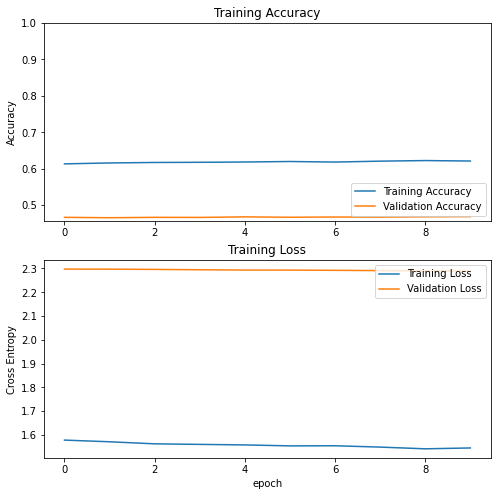

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
# plt.ylim([0,1.0])
plt.title('Training Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
model.save(datapath + '/model3_30.h5')